In [1]:
import sys
sys.path.append('..')

import numpy as np
from tqdm.auto import tqdm

from olfactory_navigation import Environment
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.simulation import run_test, SimulationHistory
from olfactory_navigation.test_setups import test_shape_robustness

# Loading Environment

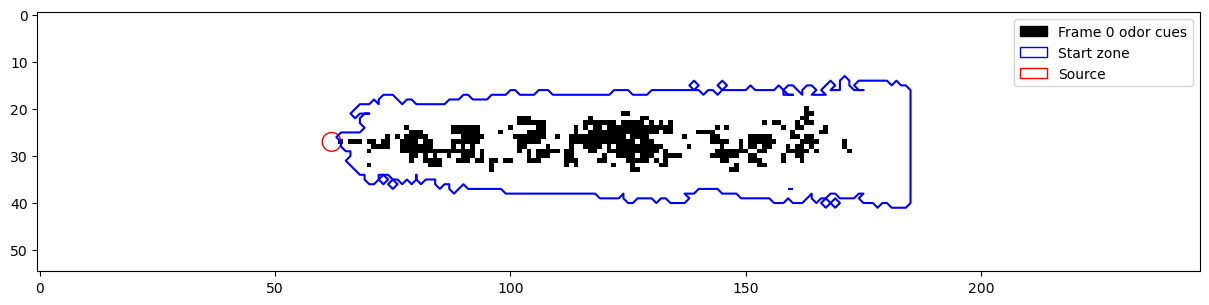

In [2]:
# data_file = "C:\\Users\\arnau\\Desktop\\Master Thesis Files [TO BACKUP]\\Data\\nose_data.npy"
data_file = "/storage/rando/data/nose_data.npy"

full_env = Environment(data_file=data_file,
                       data_source_position=[143,0],
                       source_radius=2,
                       shape=np.array([55,247]),
                       margins=[14,62],
                       boundary_condition='wrap_vertical',
                       start_zone='odor_present',
                       odor_present_threshold=3e-6
                       )

full_env.plot()

In [3]:
ag = FSVI_Agent(full_env)

[06/03/2024, 01:09:08] Instantiation of MDP Model:
[06/03/2024, 01:09:08] - 13585 states
[06/03/2024, 01:09:08] - 4 actions
[06/03/2024, 01:09:08] - At most 1 reachable states per state-action pair
[06/03/2024, 01:09:08] - Starting generation of transitions table
[06/03/2024, 01:09:08]     > [Warning] No transition matrix or function provided but reachable states are, so probability to reach any reachable states will "1 / reachable state count" so here: 1.000.
[06/03/2024, 01:09:08]     > Done in 0.000s
[06/03/2024, 01:09:08] - Generation of state grid
[06/03/2024, 01:09:08] - Generating start probabilities table
[06/03/2024, 01:09:08] - Starting computation of reachable state probabilities from transition data
[06/03/2024, 01:09:08]     > Done in 0.000s

[06/03/2024, 01:09:08] POMDP particular parameters:
[06/03/2024, 01:09:08] - 3 observations
[06/03/2024, 01:09:08] - Starting of transitional observations for reachable states table
[06/03/2024, 01:09:08]     > Done in 0.002s
[06/03/2

In [4]:
_ = ag.train(expansions=300, force=True, use_gpu=True)

[06/03/2024, 01:09:08] MDP_policy, not provided. Solving MDP with Value Iteration...
[06/03/2024, 01:09:08] Sending Model to GPU...
[06/03/2024, 01:09:09]     > Done in 0.992s


  0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Value Iteration run
  - Model: 13585-state, 4-action
  - Converged in 918 iterations and 0.6432 seconds
  - Took on average 0.0007s per iteration


Expansions:   0%|          | 0/300 [00:00<?, ?it/s]

Summary of Point Based Value Iteration run
  - Model: 13585 state, 4 action, 3 observations
  - Converged or stopped after 300 expansion steps and 300 backup steps.
  - Resulting value function has 2205 alpha vectors.
  - Converged in 21.9726s

  - Expand function took on average 0.0082s and yielded on average 664.18 beliefs per iteration. (0.0001s/it/belief)
  - Backup function took on average 0.0650s and yielded on average 7.34 alpha vectors per iteration. (0.0003s/it/alpha)
  - Pruning function took on average 0.0000s and yielded on average prunings of 0.00 alpha vectors per iteration.


In [5]:
all_histories = test_shape_robustness(
    agent=ag,
    use_gpu=True
)

The results will be saved to: ./results/06032024_011007_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2



  0%|          | 0/63 [00:00<?, ?it/s]

Testing on environment with height 20% and width 20%
Using the provided environment, not the agent environment.
Simulations done in 11.399s:
Simulations reached goal: 1156/2393 (1237 failures) (48.31%)
	- Average step count: 600.350 +- 419.57 (Successfull only: 172.696 +- 103.09)
	- Extra steps: 529.316 +- 411.60 (Successful only: 106.363 +- 63.55)
	- Average discounted rewards (ADR): 0.141 +- 0.24 (Successfull only: 0.291 +- 0.28)
	- Tmin/T: 0.246 +- 0.21 (Successful only: 0.429 +- 0.17)
Simulations saved to: ./results/06032024_011007_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2/test_env_y-20_x-20.csv

Testing on environment with height 20% and width 40%
Using the provided environment, not the agent environment.
Simulations done in 9.087s:
Simulations reached goal: 1584/2393 (809 failures) (66.19%)
	- Average step count: 443.571 +- 406.18 (Successfull only: 159.384 +- 101.80)
	- Extra steps: 372.537 +- 395.35 (Successful only: 92.7

In [8]:
import os
path = './results/06032024_011007_robustness_test_55_247-marg_14_14_62_62-edge_wrap_vertical-start_odor_present-source_27_62_radius2'
files = (os.listdir(path))

all_hist = []
for f in files:
    hist = SimulationHistory.load_from_file(path + '/' + f, environment=full_env)#, agent=ag)
    all_hist.append(hist)

In [9]:
import re
multipliers = []
for f in files:
    res = re.search('env_y(.*)_x(.*)\.csv', f)
    # print(f'y {res.group(1)}; x {res.group(2)}')
    multipliers.append([res.group(1), res.group(2)])

multipliers = np.array(multipliers)

In [10]:
from olfactory_navigation.test_setups import analyse_shape_robustness

anal_df = analyse_shape_robustness(all_hist, multipliers)
anal_df

,y_multiplier,x_multiplier,converged_mean,converged_standard_deviation,converged_success_mean,converged_success_standard_deviation,steps_taken_mean,steps_taken_standard_deviation,steps_taken_success_mean,steps_taken_success_standard_deviation,...,discounted_rewards_success_mean,discounted_rewards_success_standard_deviation,extra_steps_mean,extra_steps_standard_deviation,extra_steps_success_mean,extra_steps_success_standard_deviation,t_min_over_t_mean,t_min_over_t_standard_deviation,t_min_over_t_success_mean,t_min_over_t_success_standard_deviation
0,20,20,0.608441,0.488099,1.0,0.0,502.745926,408.879824,182.741071,115.127807,...,0.277170,0.260362,431.712495,409.824829,107.299451,81.972074,0.316401,0.232845,0.478714,0.145916
1,20,40,0.748015,0.434153,1.0,0.0,360.935646,379.251499,145.653073,91.450358,...,0.328875,0.248820,289.902215,376.862227,73.251397,58.388556,0.427907,0.242378,0.549495,0.140316
2,20,60,0.798161,0.401372,1.0,0.0,305.711241,355.348847,130.139791,74.059904,...,0.349180,0.238249,234.677810,352.203715,58.600000,40.919784,0.483546,0.243110,0.588368,0.139579
3,20,80,0.805265,0.395996,1.0,0.0,297.083159,351.553716,127.099118,71.419919,...,0.354630,0.235326,226.049728,349.354931,55.191489,38.830571,0.501432,0.251205,0.606388,0.147173
4,20,100,0.784371,0.411258,1.0,0.0,314.903886,365.154104,126.566329,74.131435,...,0.358835,0.234022,243.870455,362.134759,55.129462,42.576192,0.491378,0.258334,0.607337,0.150198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,180,60,0.658170,0.474323,1.0,0.0,412.442123,427.086393,107.285079,68.710823,...,0.418789,0.248210,341.408692,425.416979,35.965079,40.145503,0.512894,0.345180,0.742667,0.161753
59,180,80,0.757209,0.428770,1.0,0.0,313.925616,391.741248,93.942605,57.893426,...,0.450384,0.222961,242.892186,387.704395,24.044702,30.199460,0.623674,0.335307,0.799737,0.143116
60,180,100,0.837025,0.369343,1.0,0.0,238.340577,339.315599,90.039441,51.048066,...,0.454583,0.205809,167.307146,338.395802,18.432351,25.044671,0.702330,0.306982,0.825823,0.137239
61,180,120,0.863769,0.343033,1.0,0.0,211.720435,316.114193,87.395743,47.226495,...,0.459184,0.197470,140.687004,316.631465,15.313014,23.858656,0.735640,0.295046,0.841509,0.135649


In [11]:
mult_lists = {}
for col in ['y','x']:
    mult_lists[col] = np.unique(anal_df[col + '_multiplier'].to_numpy(dtype=int)).tolist()

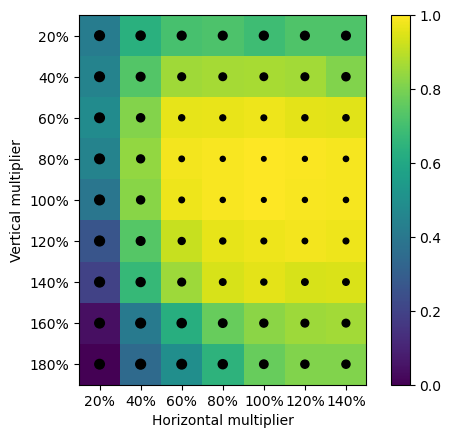

In [32]:
from matplotlib import pyplot as plt

grid_data = anal_df['converged_mean'].to_numpy().reshape([len(mults) for mults in mult_lists.values()])

plt.imshow(grid_data)

plt.scatter(anal_df['x_multiplier'], anal_df['y_multiplier'], s=anal_df['converged_standard_deviation']*100, c='black')

plt.xlabel('Horizontal multiplier')
plt.xticks(np.arange(len(mult_lists['x'])), labels=[f'{mult}%' for mult in mult_lists['x']])

plt.ylabel('Vertical multiplier')
plt.yticks(np.arange(len(mult_lists['y'])), labels=[f'{mult}%' for mult in mult_lists['y']])

plt.colorbar()
plt.show()

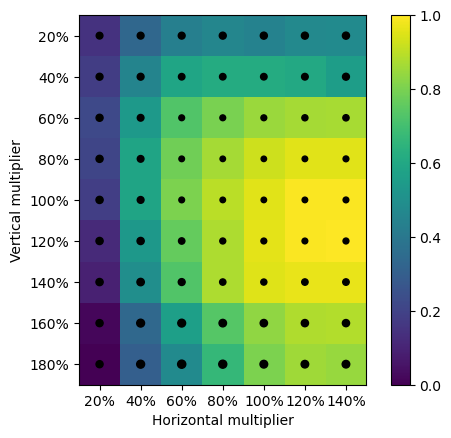

In [40]:
from matplotlib import pyplot as plt

grid_data = anal_df['t_min_over_t_mean'].to_numpy().reshape([len(mults) for mults in mult_lists.values()])

plt.imshow(grid_data)

plt.scatter(anal_df['x_multiplier'], anal_df['y_multiplier'], s=anal_df['t_min_over_t_standard_deviation']*100, c='black')

plt.xlabel('Horizontal multiplier')
plt.xticks(np.arange(len(mult_lists['x'])), labels=[f'{mult}%' for mult in mult_lists['x']])

plt.ylabel('Vertical multiplier')
plt.yticks(np.arange(len(mult_lists['y'])), labels=[f'{mult}%' for mult in mult_lists['y']])

plt.colorbar()
plt.show()